In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

In [2]:
def segmentation(width,height,inputImage,filename):
    start=0
    end=0
    j=0
    
    for row in range(width):
        #print(vertical_projection[row])
        #print(horizontal_projection[row+1])
        if vertical_projection[row-1]==0 and vertical_projection[row]!=0 : 
        
            start=row-1
            #print("ss",start)
            #print(vertical_projection[row])
        if row+1<width:
            if vertical_projection[row-1]!=0 and vertical_projection[row]==0 :
                end=row+1
            
                #print("ee",end)
                #print(vertical_projection[row-1])
                
                if(end-1-start>=7):
                    if not os.path.exists("./caracteres/"+filename.lower().replace(".png", "", 1)+"/"):
                        os.mkdir("./caracteres/"+filename.lower().replace(".png", "", 1)+"/")
                        #print("s",start)
                        #print("e",end)
                        roi=inputImage[0:height,start:end]
                        h,w,c=roi.shape
                        #print(h,w)
                    
                        cv2.imwrite("./caracteres/"+filename.lower().replace(".png", "", 1)+"/caractere"+str(j)+".png",roi)
                        j=j+1
                        start=0
                        end=0
                        #plt.imshow(roi)
                    else:
                        roi=inputImage[0:height,start:end]
                        h,w,c=roi.shape
                        #print(h,w)
                    
                        cv2.imwrite("./caracteres/"+filename.lower().replace(".png", "", 1)+"/caractere"+str(j)+".png",roi)
                        j=j+1
                        start=0
                        end=0
                
        #print(start,ed)
        if start!=0 and end==0 and row==width-1:
            roi=inputImage[0:height,start:width]
            h,w,c=roi.shape
            #print(h,w)
            #print(filename)
            #print(filename.lower().replace(".png", "", 1))
            if not os.path.exists("./caracteres/"+filename.lower().replace(".png", "", 1)+"/"):
                os.mkdir("./caracteres/"+filename.lower().replace(".png", "", 1)+"/")
                
                cv2.imwrite("./caracteres/"+filename.lower().replace(".png", "", 1)+"/caractere"+str(j)+".png",roi)
                j=j+1
                #plt.imshow(roi)
                start=0
                end=0
                
            else:
                cv2.imwrite("./caracteres/"+filename.lower().replace(".png", "", 1)+"/caractere"+str(j)+".png",roi)
                j=j+1
                #plt.imshow(roi)
                start=0
                end=0
        
                
            
        

[ 0  0 16 28 25 17 14 10  8  3  0  0  0  5 44 44 16  0  4  4  4  4  4  4
  5  7  7  8  5  5  6  6  7  5  7  8  9  8  7  9 14 17  9  0  0  0  0  0
  6 11 13 10 11 10  7  4  0  4  6  8  5  4  7  5  4  6  6  6  3  3  4  5
  4  3  4  5  7  5  4  3  3  4  3  0  0  0  6 10 12  6  5  5  4  4  5  5
  5  6  5  5  5  4  4  5  6 11 14 11  6  3  0  3  0  3  0  0  3  3  5  9
  9  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  7 10 12  7  7 10  8
  6  3  4  5  5  5  6  6  7  6  6  6  8 10  7  0  0]
[ 0  0  9 13  9  8  8  6  6  6  9 11  8  6  6  4  6  7  7  4  3  5  4  0
  3  0  3  0  0  7 12 17 10  9 11  9  8  7 11 12 11 11 25 26 14  6  7 11
 13 11  4  3  3  3  8 11 12  3  3  0  0  0  3  4  0  0  0 10 11  5  4  5
  5  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 53 54 33 11  9  9  4
  5]
[ 3  3  6  4  0  0  4  5  5  0  0  0  0  6 13 15 10  7  7  7  7  9  8  7
  7  6  7  8 10  9  7  6  7  7  9  9 11 15 10  0  4 10 11  5  6  8 11  7
  3  5  7  9  9  8  8  6  4  3  4  4  3  0  0  0  3  5  7 29 36 16

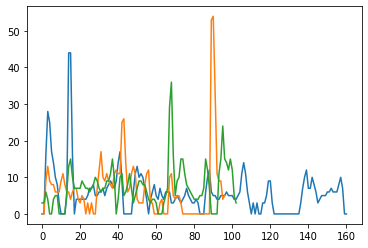

In [3]:
path="./words/"
for filename in os.listdir(path):
    im_gray = cv2.imread(path+filename,  cv2.IMREAD_GRAYSCALE)
    #plt.imshow(im_gray)
    h,w=im_gray.shape
    image = cv2.GaussianBlur(im_gray, (5,5), 1)
    th =  cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,2)
    #plt.imshow(th)
    cv2.imwrite('img.jpg',th)
    image=cv2.imread('img.jpg')
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    contours, hierarchy = cv2.findContours(th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # create an empty mask
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    #plt.imshow(mask)
    # loop through the contours
    for i, cnt in enumerate(contours):
        # if the contour has no other contours inside of it
        if hierarchy[0][i][2] == -1:
            # if the size of the contour is greater than a threshold
            if cv2.contourArea(cnt) <70:
                cv2.drawContours(mask, [cnt], 0, (255), -1)
                #plt.imshow(mask)
        #result = binarizedImage - (mask+255)
    result=th+mask
    result = cv2.GaussianBlur(result, (3,3), 0)
    #plt.imshow(result)
    _, binarizedImage = cv2.threshold(result, 90, 255, cv2.THRESH_BINARY)
    binarizedImage[binarizedImage == 0] = 1
    binarizedImage[binarizedImage == 255] = 0
    vertical_projection = np.sum(binarizedImage, axis=0)
    for i in range(len(vertical_projection)):
        if(vertical_projection[i]<=2):
            vertical_projection[i]=0
    print(vertical_projection)
    plt.plot(vertical_projection)
    segmentation(w,h,image,filename)

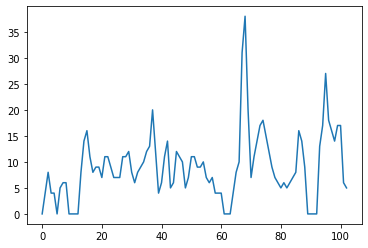

In [36]:
plt.plot(vertical_projection)